**Notebook Details**\
Author: Vera Lake\
TASK 1: CLUSTERING TECHNIQUES

# Scenario
One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.\

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

# Web Links
1. Data sets and associated data dictionaries: https://lrps.wgu.edu/provision/227080252

# Part I: Research Question
## A. Describe the purpose of this data mining report by doing the following:
1. Propose **one** question relevant to a real-world organizational situtation that you will answer using **one** of the following clustering techniques:
*Rubric: The submission proposes 1 question that is relevant to a real-world organizational situation, and the proposal includes 1 of the given clustering techniques.*

**What is the optimal number of customer segments to create unique marketing campaigns for TeleCo?**

- k-means - this is the selected method. 
    - Resource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- hierarchical

2. Define **one** goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*Rubric: The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*
One goal of the data analysis is to find the optimal number of clusters within the data set for segmenting customers.

# Part II: Technique Justification

## B.  Explain the reasons for your chosen clustering technique from part A1 by doing the following:
Resource: https://scikit-learn.org/stable/modules/clustering.html#k-means

1.  Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.
*Rubric: The submission logically explains how the chosen clustering technique analyzes the selected dataset and includes accurate expected outcomes.*

The KMeans clustering technique analyzes the churn data set by assigning customers to n groups of equal variance. 

2.  Summarize one assumption of the clustering technique.
*Rubric: The submission adequately summarizes 1 assumption of the clustering technique.*

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of ***N*** samples ***X*** into ***K*** disjoint clusters ***C***, each described by the mean  of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from ***X***, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

 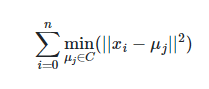

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.
*Rubric: The submission lists the packages or libraries chosen for Python or R and justifies how each item on the list supports the analysis.*

**pandas**
For data cleaning, exploration, and analysis.  

**scikit-learn***
1. cluster.k-mean package for executing and analyzing the k-means clustering
2. preprecessing.StandardScaler for normalizing the data before modeling by standardizing the features by removing the mean and scaling to unit variance. This results in better results in the KMeans model.
3. metrics.slihouette_score for use after the Elbow method to select the appropriate number of clusters from the KMeans model.

**seaborn**
For data exploration and visualization.

**matplotlib.pylplot**
For data exploration, visualization, and KMeans model analysis.

In [1]:
# Data Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Preparation and Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [3]:
# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

In [4]:
# Read the raw data
churn_data = pd.read_csv('./Churn Data/churn_clean.csv', index_col=0)

In [5]:
# Look at the data we have
churn_data.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
col_names = churn_data.columns
col_names

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [7]:
# Drop unecessary columns
churn_data.drop(['Customer_id', 'UID', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

# Part III: Data Preparation

## C.  Perform data preparation for the chosen dataset by doing the following

1.  Describe one data preprocessing goal relevant to the clustering technique from part A1.
*Rubric: The submission describes 1 data preprocessing goal that is relevant to the clustering technique from part A1.*

Normalize the data prior to k-means clustering to:
- attempt to alleviate the known problems that very high-dimensional data such as income or age can become inflated. 
- speed up the computations

3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.
*Rubric: The submission accurately explains each step used to prepare the data for analysis, and the submission identifies an accurate code segment for each step.*
1. Rename features for clarity
2. Look at the data we have
3. Check for any null data and address accordingly
4. Dummy encode the categorical features
5. Normalize the features
6. Create a separate list for categorical and continuous features

In [8]:
# Data Preparation Step 1: Rename features for clarity
churn_data = churn_data.rename(columns={
    "Employment": "Employment_Status", 
    "Marital":"Marital_Status", 
    "Outage_sec_perweek": "Outage_Seconds_Per_Week", 
    "Contacts": "Technical_Support_Contacted_Count",
    "Techie": "Is_Techie",
    "Contract": "Contract_Term",
    "Port_modem": "Has_Port_Modem",
    "Tablet": "Has_Tablet",
    "InternetService": "Internet_Service_Type",
    "Phone":"Has_Phone_Service",
    "Multiple":"Has_Multiple_Lines",
    "OnlineSecurity": "Has_Online_Security",
    "OnlineBackup": "Has_Online_Backup",
    "DeviceProtection": "Has_Device_Protection",
    "TechSupport":"Has_Tech_Support",
    "StreamingTV": "Has_Streaming_TV",
    "StreamingMovies": "Has_Streaming_Movies",
    "PaperlessBilling": "Has_Paperless_Billing",
    "PaymentMethod": "Payment_Method_Type",
    "Population": "Population_Within_A_Mile",
    "Children": "Children_Count",
    "Email": "Email_Sent_To_Customer_Count",
    "Yearly_equip_failure": "Yearly_Equip_Failure_Count",
    "MonthlyCharge": "Avg_Monthly_Charge",
    "Bandwidth_GB_Year": "Avg_Bandwidth_GB_Usage_Per_Year"
})
churn_data.head(1)

# Data Preparation Step 2: Look at the data we have

,Population_Within_A_Mile,Area,Children_Count,Age,Income,Marital_Status,Gender,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Contract_Term,Has_Port_Modem,Has_Tablet,Internet_Service_Type,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Payment_Method_Type,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611


<AxesSubplot:ylabel='CaseOrder'>

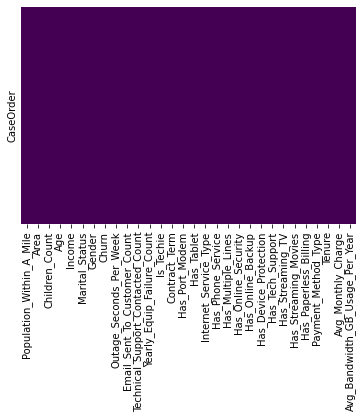

In [9]:
# Data Preparation Step 3: Check for any null data and address accordingly
# create heat map to visualize missing data
# the yellow bars stands for null points
sns.heatmap(churn_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
# Impute missing fields with the median value
churn_data=churn_data.fillna(churn_data.median())
churn_data.isnull().values.any()

False

In [11]:
# Data Preparation Step 4: Dummy encode categorical data
# Dummy encoding for categorical data - needed to scale the features
mapping = {"Yes": 1, "No": 0}
churn_data.replace(mapping, inplace=True)
churn_data = pd.get_dummies(data=churn_data)
churn_data.head()

,Population_Within_A_Mile,Children_Count,Age,Income,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Has_Port_Modem,Has_Tablet,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year,Area_Rural,Area_Suburban,Area_Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Never Married,Marital_Status_Separated,Marital_Status_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Term_Month-to-month,Contract_Term_One year,Contract_Term_Two Year,Internet_Service_Type_DSL,Internet_Service_Type_Fiber Optic,Internet_Service_Type_None,Payment_Method_Type_Bank Transfer(automatic),Payment_Method_Type_Credit Card (automatic),Payment_Method_Type_Electronic Check,Payment_Method_Type_Mailed Check
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
2,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
3,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0
4,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
5,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1


In [12]:
# Data Preparation Step 5: Normalize the features
# noramlize the data by scaling
sc = StandardScaler()
sc.fit(churn_data)
scaled_data_array = sc.transform(churn_data)
scaled_features = pd.DataFrame(scaled_data_array, columns = churn_data.columns)
scaled_features.head()

,Population_Within_A_Mile,Children_Count,Age,Income,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Has_Port_Modem,Has_Tablet,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year,Area_Rural,Area_Suburban,Area_Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Never Married,Marital_Status_Separated,Marital_Status_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Term_Month-to-month,Contract_Term_One year,Contract_Term_Two Year,Internet_Service_Type_DSL,Internet_Service_Type_Fiber Optic,Internet_Service_Type_None,Payment_Method_Type_Bank Transfer(automatic),Payment_Method_Type_Credit Card (automatic),Payment_Method_Type_Electronic Check,Payment_Method_Type_Mailed Check
0,-0.673405,-0.972338,0.720925,-0.398778,-0.600453,-0.679978,-0.666282,-1.005852,0.946658,-0.449198,1.033770,1.530805,0.320781,-0.924445,1.340306,1.104203,-0.88389,-0.774597,-0.985899,1.022247,0.836721,-1.048746,-0.003943,-1.138487,-0.706099,-0.709123,1.416231,-0.514337,-0.486052,-0.493115,-0.502187,1.983280,-1.005013,1.052581,-0.153773,-1.095767,1.938395,-0.568420,-0.727842,1.126323,-0.520083,-0.535570,1.949556,-0.717421,-0.544993
1,0.047772,-0.506592,-1.259957,-0.641954,1.665408,0.570331,-0.005288,-1.005852,0.946658,2.226191,-0.967333,1.530805,0.320781,1.081730,1.340306,-0.905631,-0.88389,-0.774597,1.014302,1.022247,0.836721,-1.262001,1.630326,-1.185876,-0.706099,-0.709123,1.416231,-0.514337,2.057392,-0.493115,-0.502187,-0.504215,0.995012,-0.950046,-0.153773,0.912603,-0.515891,-0.568420,-0.727842,1.126323,-0.520083,1.867168,-0.512937,-0.717421,-0.544993
2,-0.417238,0.890646,-0.148730,-1.070885,-0.600453,0.252347,-0.996779,-1.005852,0.946658,2.226191,1.033770,-0.653251,0.320781,1.081730,-0.746098,-0.905631,-0.88389,-0.774597,-0.985899,1.022247,0.836721,-0.709940,-0.295225,-0.612138,-0.706099,-0.709123,1.416231,-0.514337,-0.486052,-0.493115,-0.502187,1.983280,0.995012,-0.950046,-0.153773,-1.095767,-0.515891,1.759262,1.373925,-0.887845,-0.520083,-0.535570,1.949556,-0.717421,-0.544993
3,0.284537,-0.506592,-0.245359,-0.740525,-0.600453,1.650506,0.986203,1.017588,-0.625864,2.226191,-0.967333,-0.653251,0.320781,-0.924445,1.340306,-0.905631,-0.88389,-0.774597,1.014302,-0.978237,0.836721,-0.659524,-1.226521,-0.561857,-0.706099,1.410193,-0.706099,-0.514337,2.057392,-0.493115,-0.502187,-0.504215,-1.005013,1.052581,-0.153773,-1.095767,-0.515891,1.759262,1.373925,-0.887845,-0.520083,-0.535570,-0.512937,-0.717421,1.834888
4,0.110549,-0.972338,1.445638,0.009478,1.665408,-0.623156,1.316700,1.017588,0.946658,-0.449198,1.033770,-0.653251,-3.117389,-0.924445,-0.746098,-0.905631,-0.88389,1.290994,1.014302,-0.978237,-1.195142,-1.242551,-0.528086,-1.428184,-0.706099,1.410193,-0.706099,-0.514337,-0.486052,-0.493115,1.991292,-0.504215,-1.005013,1.052581,-0.153773,0.912603,-0.515891,-0.568420,-0.727842,1.126323,-0.520083,-0.535570,-0.512937,-0.717421,1.834888


2.  Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.
*Rubric: The submission identifies the data set variables used to perform the analysis for the clustering question from part A1, and the submission accurately clusters each variable as continuous or categorical.*

In [13]:
# Data Preparation Step 6: Create a separate list for categorical and continous features
categorical_features = churn_data[[
    'Churn',
    'Is_Techie',
    'Has_Port_Modem',
    'Has_Tablet',
    'Has_Phone_Service',
    'Has_Multiple_Lines',
    'Has_Online_Security',
    'Has_Online_Backup',
    'Has_Device_Protection',
    'Has_Tech_Support',
    'Has_Streaming_TV',
    'Has_Streaming_Movies',
    'Has_Paperless_Billing',
    'Area_Rural',
    'Area_Suburban',
    'Area_Urban',
    'Marital_Status_Divorced',
    'Marital_Status_Married',
    'Marital_Status_Never Married',
    'Marital_Status_Separated',
    'Marital_Status_Widowed',
    'Gender_Female',
    'Gender_Male',
    'Gender_Nonbinary',
    'Contract_Term_Month-to-month',
    'Contract_Term_One year',
    'Contract_Term_Two Year',
    'Internet_Service_Type_DSL',
    'Internet_Service_Type_Fiber Optic',
    'Internet_Service_Type_None',
    'Payment_Method_Type_Bank Transfer(automatic)',
    'Payment_Method_Type_Credit Card (automatic)',
    'Payment_Method_Type_Electronic Check',
    'Payment_Method_Type_Mailed Check'
]]


In [14]:
continuous_features = churn_data[[
    'Population_Within_A_Mile',
    'Children_Count',
    'Age',
    'Income',
    'Outage_Seconds_Per_Week',
    'Email_Sent_To_Customer_Count',
    'Technical_Support_Contacted_Count',
    'Yearly_Equip_Failure_Count',
    'Tenure'
]]

4.  Provide a copy of the cleaned dataset.
*Rubric: The submission includes an accurate copy of the cleaned dataset.*

In [15]:
churn_data.to_csv('./Churn Data/kmean_cleaned_data.csv')

# Part IV: Analysis

## D.  Perform the data analysis and report on the results by doing the following:

1.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.
*Rubric: The submission accurately describes the analysis technique used to appropriately analyze the data, and the submission includes accurate screenshots of the intermediate calculations performed.*

To cluster this data using a KMeans classification algorithm:
https://medium.com/data-science-on-customer-churn-data/unsupervised-learning-using-kmeans-clustering-629b26e1ce1e

    1. Choose a range of number of clusters (k)

    2. Create a model for each choice of the number of clusters

    3. Compute inertia for each of the models

    4. Create a plot of inertia values and number of clusters

    5. Determine the right number of clusters using the Elbow method and  Silhouette Scoring

    6. For the chosen number of clusters create the KMeans model and label the data

    7. Additionally, run exploratory analysis to check if the cluster labels assigned by KMeans correspond to the existing label in the data (the labels which existed by were dropped for the purpose of KMeans analysis, the categorical variables)

**Note: KMeans in an unsupervised learning model and therefore does not require the data to be split into train and test data sets.** (Source: https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/#:~:text=Building%20and%20Training%20Our%20K%20Means%20Clustering%20Model&text=Namely%2C%20we%20did%20not%20have,building%20unsupervised%20machine%20learning%20models!)

2.  Provide the code used to perform the clustering analysis technique from part 2.
*Rubric: The submission provides the code used to perform the clustering analysis technique from part D1 and the code executes without errors.*

In [16]:
# Instantiate the KMeans class
# https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)
kmeans_predict = kmeans.fit_predict(scaled_features)

In [17]:
kmeans.score(scaled_features)

-416975.5724620479

In [18]:
# The lowest SSE value
kmeans.inertia_

416975.5724620479

In [19]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.19901899e-02,  5.03083210e-03, -1.82391968e-02,
        -2.48429390e-02, -5.94794976e-01,  5.74773039e-03,
        -1.89494680e-03, -2.83438712e-03,  2.12089684e-02,
        -4.46231677e-02,  1.56934460e-03, -7.85169333e-03,
         1.16893970e-02, -9.22502074e-02,  1.86465731e-02,
        -3.90157532e-02, -2.27663149e-02, -2.49315243e-02,
        -1.20662332e-01, -1.71160183e-01, -9.51254436e-03,
         2.87575790e-01, -2.26856572e-01,  2.78472076e-01,
         4.09225856e-03,  5.35215394e-03, -9.45202666e-03,
         1.02622190e-02,  2.31168321e-03,  9.83345066e-03,
        -1.71897801e-02, -5.19778816e-03, -1.00501256e+00,
         9.57005689e-01,  1.63923338e-01, -1.70155500e-01,
         7.65698937e-02,  1.24588620e-01, -4.49425840e-02,
         2.31130773e-02,  2.42037591e-02,  1.04459124e-02,
         1.72776286e-02, -1.20909000e-02, -1.34155503e-02],
       [ 2.27598407e-02,  1.74222676e-03,  9.38876766e-03,
         1.56115449e-02, -5.92623412e-01, -7.42603677e-

In [20]:
# The number of iterations required to converge
kmeans.n_iter_

12

In [21]:
# Look at the first 5 preditcted labels
kmeans.labels_[:5]

array([0, 2, 1, 0, 2])

In [22]:
scaled_features['Cluster'] = kmeans_predict
score = silhouette_score(scaled_features, kmeans_predict, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.051


I want to see if I can improve the Silhouette Score. To do this I will look at an elbow graph to select the best number of clusters.

## Choosing the Appropriate Number of Clusters
- The elbow method
- The silhouette coefficient
These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [23]:
# A list holds the SSE values for each k
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# sum of the squared Euclidean distances of each point to its closest centroid
# https://realpython.com/k-means-clustering-python/#:~:text=The%20SSE%20is%20defined%20as,try%20to%20minimize%20this%20value.&text=The%20purpose%20of%20this%20figure,centroids%20is%20an%20important%20step.
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

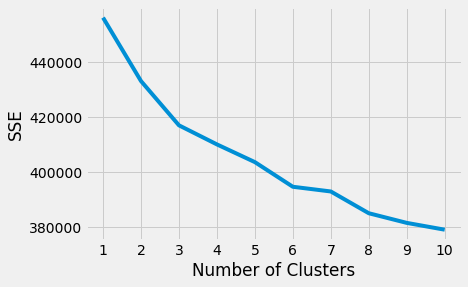

In [24]:
# View the Elbow graph
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

It looks like 2, 3 and 5 clusters might be good selections for the number of clusters. Let's look at the Silhouette Score for 2, 3 and 6. We know the score for 3 clusters is 0.051%.

"The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters." (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,near%200%20denote%20overlapping%20clusters)

### Silhouette Score for 2 clusters

In [25]:
kmeans2 = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42)
kmeans_predict = kmeans2.fit_predict(scaled_features)

scaled_features['Cluster'] = kmeans_predict
score = silhouette_score(scaled_features, kmeans_predict, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.052


### Silhouette Score for 3 clusters

In [26]:
kmeans3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)
kmeans_predict = kmeans3.fit_predict(scaled_features)

scaled_features['Cluster'] = kmeans_predict
score = silhouette_score(scaled_features, kmeans_predict, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.051


### Silhouette Score for 6 Clusters
This score score for 6 clusters is the best score. I will move forward with 6 clusters as the optimal number of customer segments. 

In [27]:
kmeans6 = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42)
kmeans_predict = kmeans6.fit_predict(scaled_features)

scaled_features['Cluster'] = kmeans_predict
score = silhouette_score(scaled_features, kmeans_predict, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.059


In [28]:
scaled_features.head(1)

,Population_Within_A_Mile,Children_Count,Age,Income,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Has_Port_Modem,Has_Tablet,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year,Area_Rural,Area_Suburban,Area_Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Never Married,Marital_Status_Separated,Marital_Status_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Term_Month-to-month,Contract_Term_One year,Contract_Term_Two Year,Internet_Service_Type_DSL,Internet_Service_Type_Fiber Optic,Internet_Service_Type_None,Payment_Method_Type_Bank Transfer(automatic),Payment_Method_Type_Credit Card (automatic),Payment_Method_Type_Electronic Check,Payment_Method_Type_Mailed Check,Cluster
0,-0.673405,-0.972338,0.720925,-0.398778,-0.600453,-0.679978,-0.666282,-1.005852,0.946658,-0.449198,1.03377,1.530805,0.320781,-0.924445,1.340306,1.104203,-0.88389,-0.774597,-0.985899,1.022247,0.836721,-1.048746,-0.003943,-1.138487,-0.706099,-0.709123,1.416231,-0.514337,-0.486052,-0.493115,-0.502187,1.98328,-1.005013,1.052581,-0.153773,-1.095767,1.938395,-0.56842,-0.727842,1.126323,-0.520083,-0.53557,1.949556,-0.717421,-0.544993,1


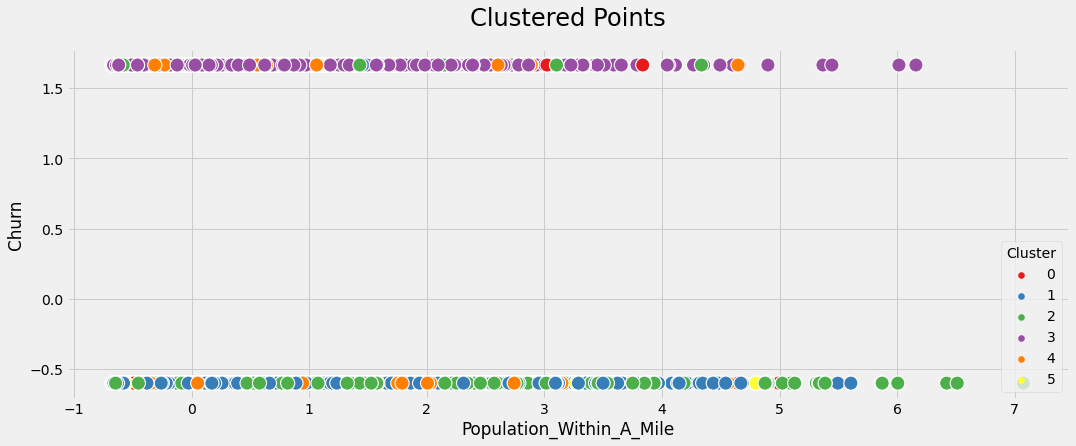

In [29]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=scaled_features, x="Population_Within_A_Mile", y="Churn", hue='Cluster', 
                     s=200, palette='Set1', legend=True)
plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

Cluster 2 for the Population_Within_A_Mile have a higher likelihood to churn. Creating a retention marketing campaign for this cluster is a good choice.

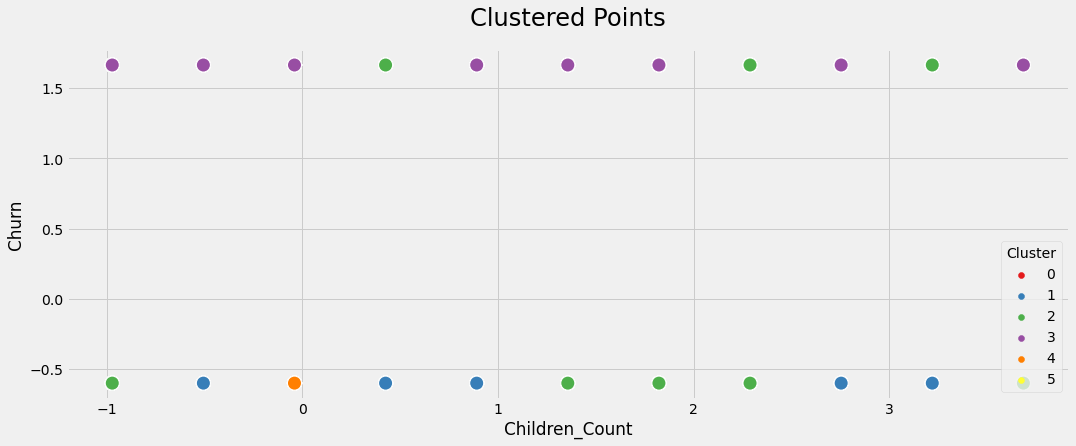

In [30]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=scaled_features, x="Children_Count", y="Churn", hue='Cluster', 
                     s=200, palette='Set1', legend=True)
plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

Cluster 2 for the Children_Count have a higher likelihood to churn. Creating a retention marketing campaign for this cluster is a good choice.

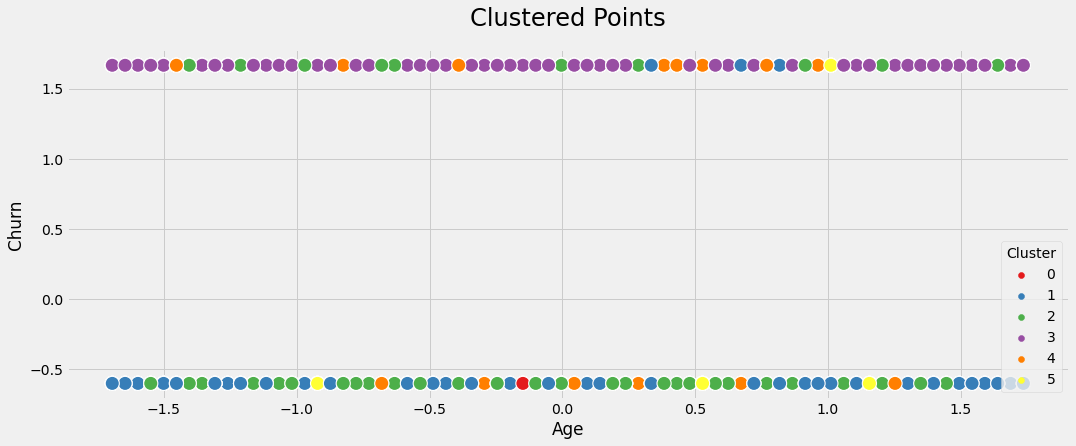

In [31]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=scaled_features, x="Age", y="Churn", hue='Cluster', 
                     s=200, palette='Set1', legend=True)
plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

Cluster 2 for the Age have a higher likelihood to churn. Creating a retention marketing campaign for this cluster is a good choice.

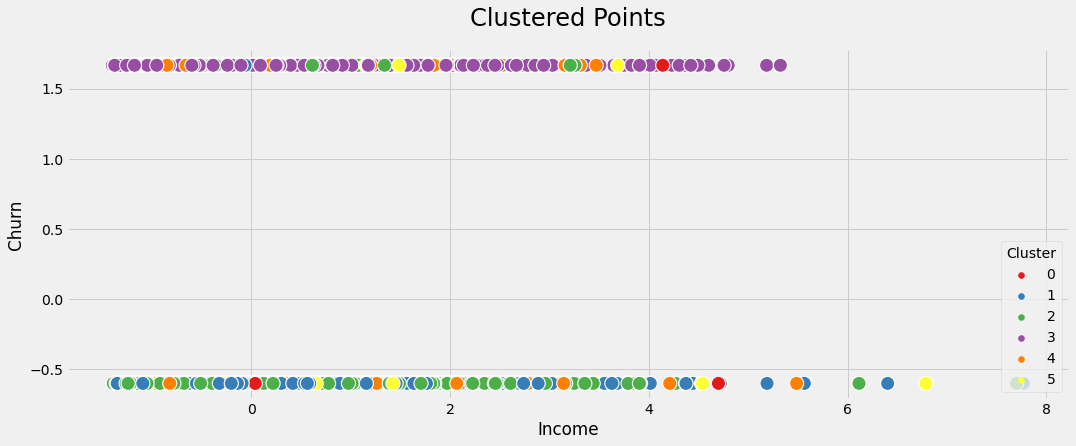

In [32]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=scaled_features, x="Income", y="Churn", hue='Cluster', 
                     s=200, palette='Set1', legend=True)
plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

Cluster 2 for the Income have a higher likelihood to churn. Creating a retention marketing campaign for this cluster is a good choice.

It is safe to assume that cluster 2 will all have the propensity to churn in common.

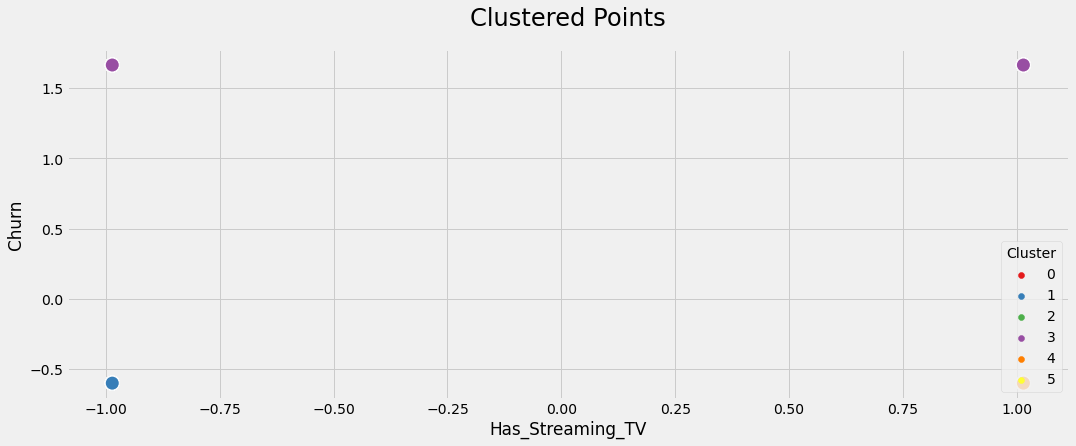

In [33]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(data=scaled_features, x="Has_Streaming_TV", y="Churn", hue='Cluster', 
                     s=200, palette='Set1', legend=True)
plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

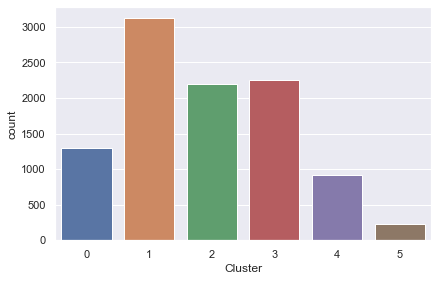

In [34]:
sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Cluster', data=scaled_features)

<AxesSubplot:xlabel='Cluster', ylabel='Churn'>

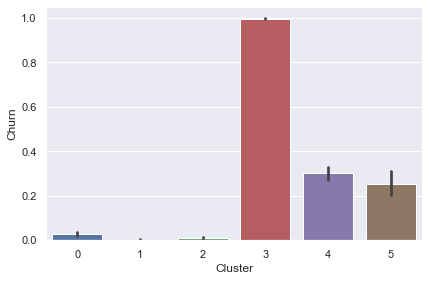

In [35]:
churn_data['Cluster'] = kmeans_predict
sns.barplot(x='Cluster', y='Churn', data=churn_data)

<AxesSubplot:xlabel='Cluster', ylabel='Has_Phone_Service'>

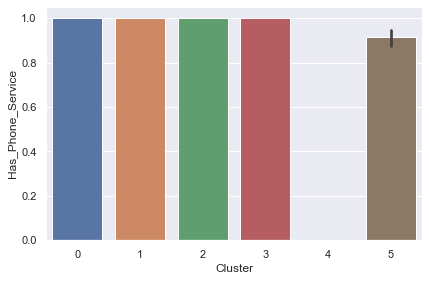

In [36]:
churn_data['Cluster'] = kmeans_predict
features = churn_data.columns.values.tolist()
num_features = len(features)
num_cols_in_view = 0
sns.barplot(x='Cluster', y='Has_Phone_Service', data=churn_data)

In [37]:
churn_data.describe()

,Population_Within_A_Mile,Children_Count,Age,Income,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Has_Port_Modem,Has_Tablet,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year,Area_Rural,Area_Suburban,Area_Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Never Married,Marital_Status_Separated,Marital_Status_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Term_Month-to-month,Contract_Term_One year,Contract_Term_Two Year,Internet_Service_Type_DSL,Internet_Service_Type_Fiber Optic,Internet_Service_Type_None,Payment_Method_Type_Bank Transfer(automatic),Payment_Method_Type_Credit Card (automatic),Payment_Method_Type_Electronic Check,Payment_Method_Type_Mailed Check,Cluster
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000
mean,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,0.332700,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.202700,0.502500,0.474400,0.023100,0.545600,0.210200,0.244200,0.346300,0.440800,0.212900,0.222900,0.208300,0.339800,0.22900,1.90630
std,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,0.471204,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.402031,0.500019,0.499369,0.150229,0.497941,0.407471,0.429633,0.475814,0.496508,0.409378,0.416213,0.406113,0.473665,0.42021,1.27196
min,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
50%,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.00000
75%,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.479795,200.734725,5586.141369,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0

## Visualize to Analyze: Categorical Clusters

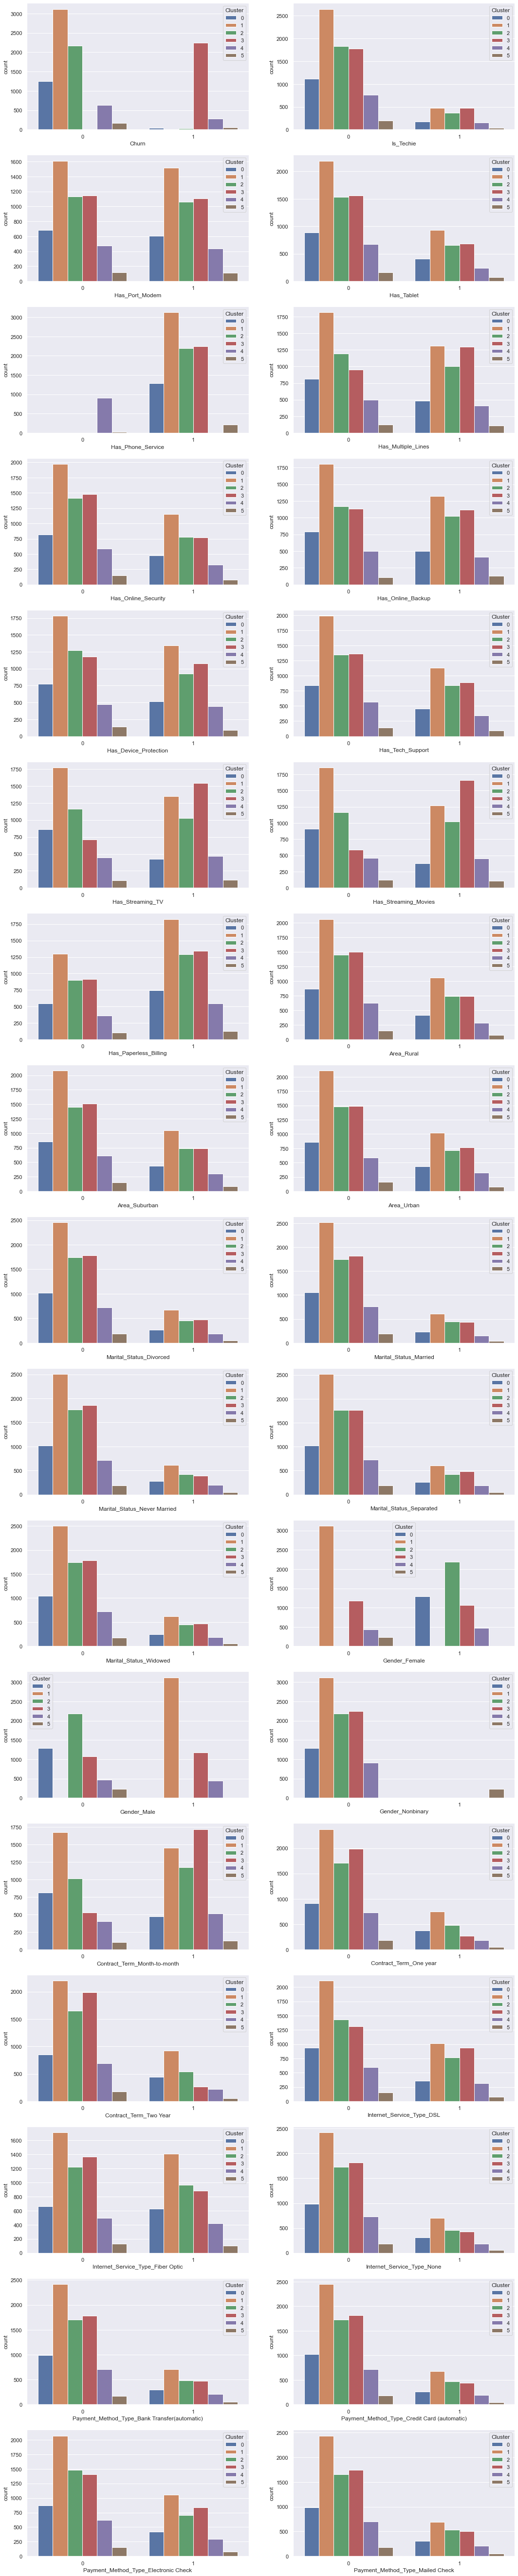

In [38]:
churn_data['Cluster'] = kmeans_predict
# churn_data.drop('Labels', inplace=True)
row = 0
fig, ax =plt.subplots(17,2,figsize=(16,90))

for feature in categorical_features:
    sns.countplot(hue='Cluster', x=feature, data=churn_data, ax=ax[row][num_cols_in_view])
    num_cols_in_view = num_cols_in_view + 1
    if num_cols_in_view is 2:
        num_cols_in_view = 0
        row = row + 1

fig.show()

## Visualize to Analyze: Continuous Clusters

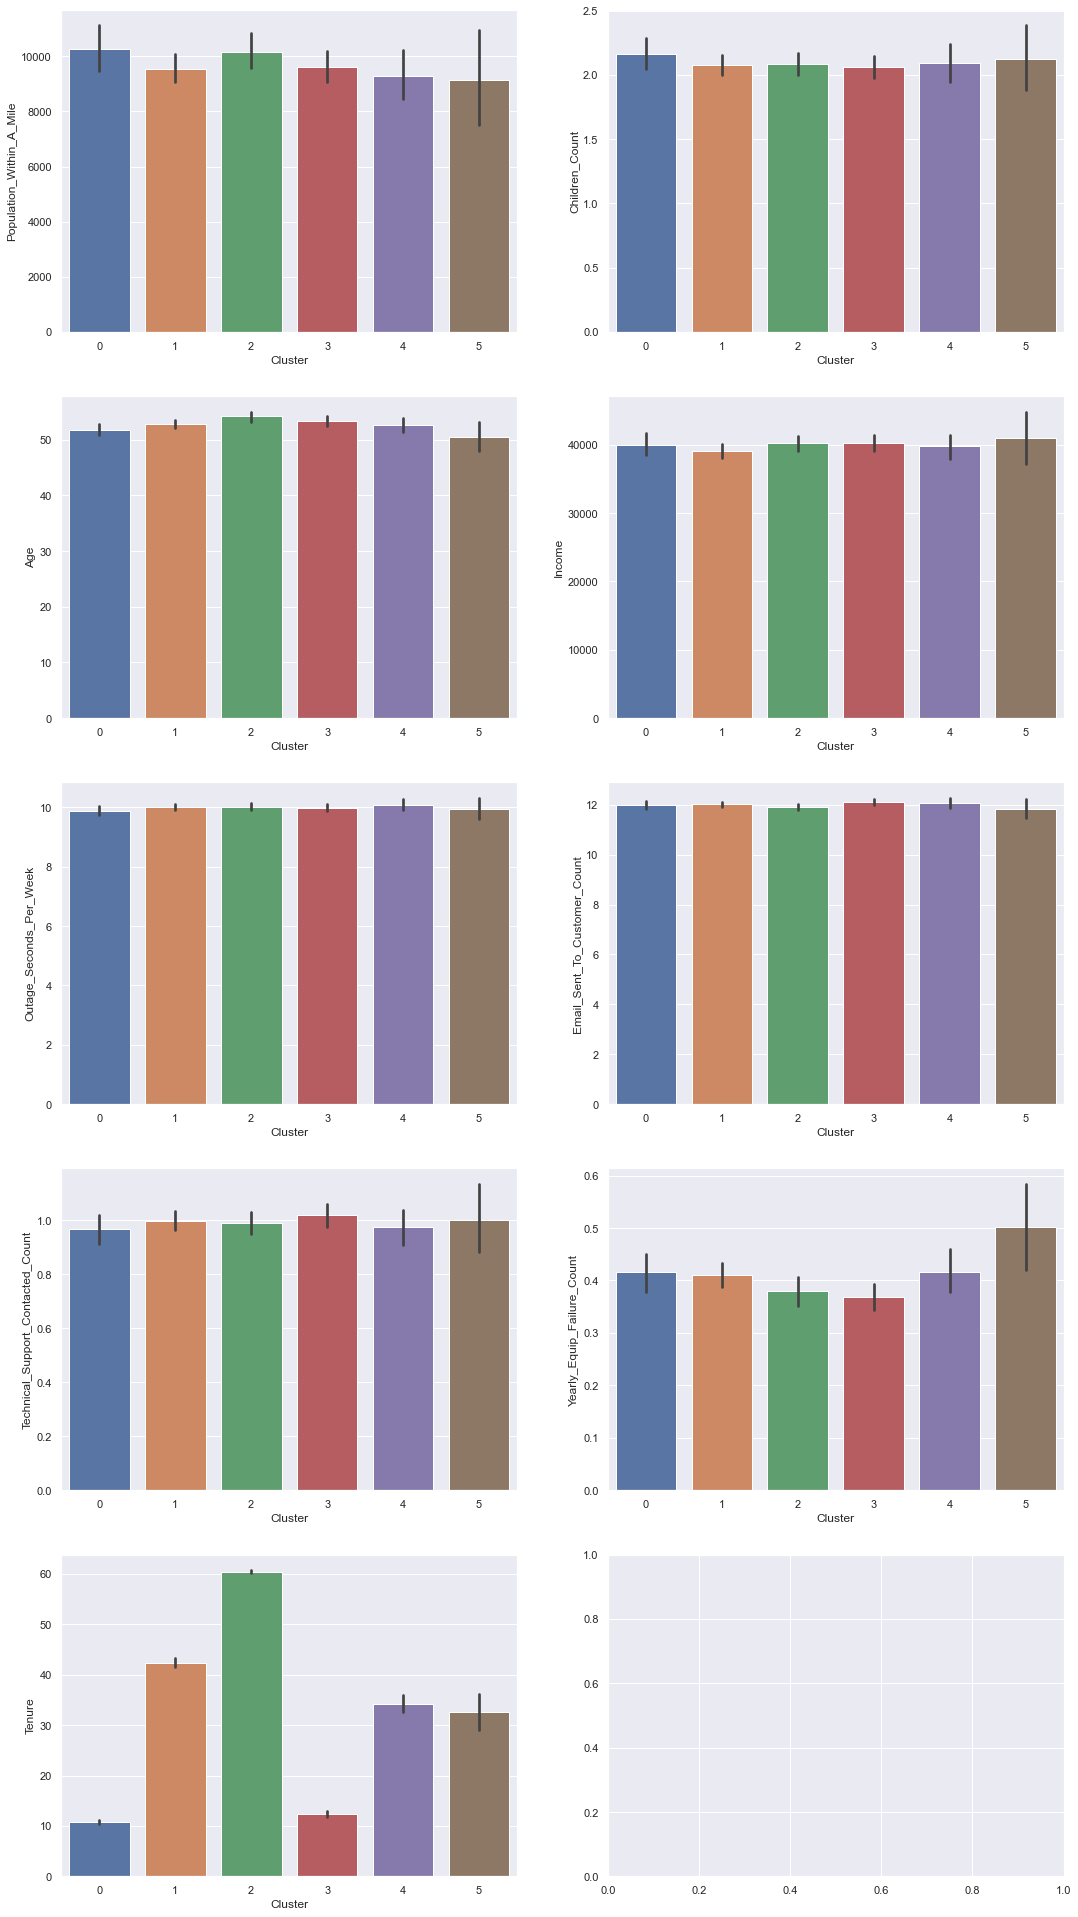

In [39]:
row = 0
fig, ax =plt.subplots(5,2,figsize=(16,32))

for feature in continuous_features:
    sns.barplot(x='Cluster', y=feature, data=churn_data, ax=ax[row][num_cols_in_view])
    num_cols_in_view = num_cols_in_view + 1
    if num_cols_in_view is 2:
        num_cols_in_view = 0
        row = row + 1

fig.show()

# Cluster Analysis
## All Clusters
- Less likely to be tech saavy
- Less likely to have a tablet
- Less likely to have online security
- Slightly more likely to have tech support

##  Cluster 0
- Lower likelihood to churn
- Most likely to be Male
- Tenure between 40 and 45 months

##  Cluster 1
- Lower likelihood to churn
- Only on a one year term contract
- Tenure between 35-40 Months

##  Cluster 2
- Has a high likelihood to churn - target for retention efforts
- Slightly more likely to be categorized as tech saavy
- More likely to have phone service and multiple lines
- More likely to Stream TV and Movies
- More likely to have paperless billing
- More likely to be on a month to month contract
- Most likely on DSL, sceondarily on Fiber Optic
- Lowest Tenure - 10-12 months


##  Cluster 3
- Lower likelihood to churn
- Most ikely to be Female
- Only on a month to month contract
- Tenure between 45-50 months

##  Cluster 4
- Lower likelihood to churn
- Only on a Two Year Contract
- Tenure between 38-40 months

## Cluster 5
- most likely to have fiber optic cable
- most likely to be on a month to month contract
- slightly more likely to have paperless billing
- more unlikely to have tech support
- more unlikely to have online security
- less likely to have a tablet
- very likely to have a low churn rate
- very unlikely to be tech saavy

# Part V: Data Summary and Implications

## E.  Summarize your data analysis by doing the following:

1.  Explain the accuracy of your clustering technique.
*Rubric: The submission logically explains the accuracy of the clustering technique.*

Based on our Silhouette Score for the recommended 6 clusters of the KMeans model the clusters can be expected to overlap some because the score is so close to 0. This means that the accuracy of the cluster can be expected to be lower for each cluster and whether a customer has been placed in the appropriate cluster. 

2.  Discuss the results and implications of your clustering analysis.
*Rubric: The submission adequately discusses both the results and implications of the clustering analysis.*

**Results**
The results of the KMeans model are that there are 6 recommended customer segments to create for targeted marketing.

**Implications**
The implications that are drawn from the analysis are:
- Create 6 customer segments
- Use the visualizations and cluster analysis to create targeted marketing campaigns
- Add a PCA for potentially better results

3.  Discuss one limitation of your data analysis.
*Rubric: The submission logically discusses 1 limitation of the data analysis with adequate detail.*
A limitation of the data analysis is that a PCA analysis was not utilized before building the KMeans model. To produce better results it would be wise to add a PCA analysis to the data processing steps for the KMeans analysis.

4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.
*Rubric: The submission recommends a reasonable course of action for the real-world organizational situation from part A1 based on the results and implications discussed in part E2.*
The course of action is to:
- Create 6 customer segments
- Use the visualizations and cluster analysis to create targeted marketing campaigns

# Part VI: Demonstration

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
*Rubric: The submission provides a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.*

Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Mining II – OFM3.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.
 

## G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
*Rubric: The submission records all web sources used to acquire data or segments of third-party code, and the web sources are reliable.*
1. https://realpython.com/k-means-clustering-python/#:~:text=The%20SSE%20is%20defined%20as,try%20to%20minimize%20this%20value.&text=The%20purpose%20of%20this%20figure,centroids%20is%20an%20important%20step
2. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20value%20of%20the%20silhouette,near%200%20denote%20overlapping%20clusters
3. https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python
 

## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
*Rubric: The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.*
1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. https://scikit-learn.org/stable/modules/clustering.html#k-means
3. https://medium.com/data-science-on-customer-churn-data/unsupervised-learning-using-kmeans-clustering-629b26e1ce1e
4. https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/#:~:text=Building%20and%20Training%20Our%20K%20Means%20Clustering%20Model&text=Namely%2C%20we%20did%20not%20have,building%20unsupervised%20machine%20learning%20models
 

## I.  Demonstrate professional communication in the content and presentation of your submission.
*Rubric: Content reflects attention to detail, is organized, and focuses on the main ideas as prescribed in the task or chosen by the candidate. Terminology is pertinent, is used correctly, and effectively conveys the intended meaning. Mechanics, usage, and grammar promote accurate interpretation and understanding.*

**File Restrictions**
File name may contain only letters, numbers, spaces, and these symbols: ! - _ . * ' ( )
File size limit: 200 MB
File types allowed: doc, docx, rtf, xls, xlsx, ppt, pptx, odt, pdf, txt, qt, mov, mpg, avi, mp3, wav, mp4, wma, flv, asf, mpeg, wmv, m4v, svg, tif, tiff, jpeg, jpg, gif, png, zip, rar, tar, 7z